In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# TASK - 1
Read the dataset and do data pre-processing

In [181]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [182]:
df = pd.read_csv(r"/content/gdrive/MyDrive/Colab Notebooks/smartBridge/archive/drug200.csv")

In [183]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [184]:
df.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [185]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [187]:
df.Sex.unique()

array(['F', 'M'], dtype=object)

In [188]:
df.Drug.unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [189]:
df.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [190]:
df.corr()

<ipython-input-190-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


<Axes: ylabel='Drug'>

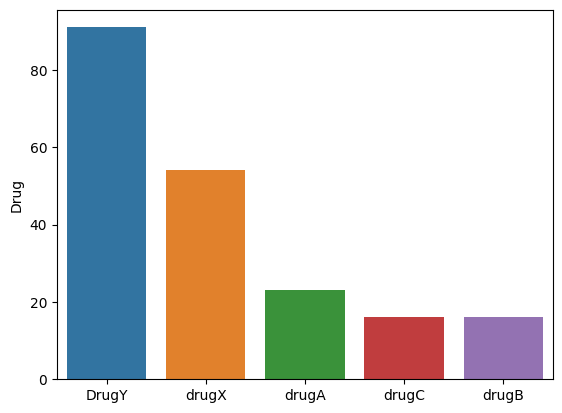

In [191]:
sns.barplot(x=df.Drug.value_counts().index,y=df.Drug.value_counts())

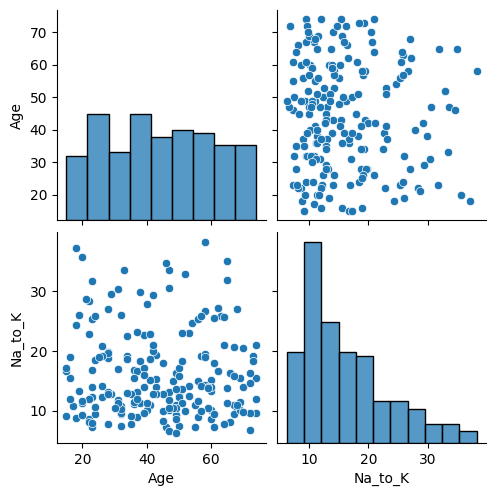

In [192]:
sns.pairplot(df)

<Axes: >

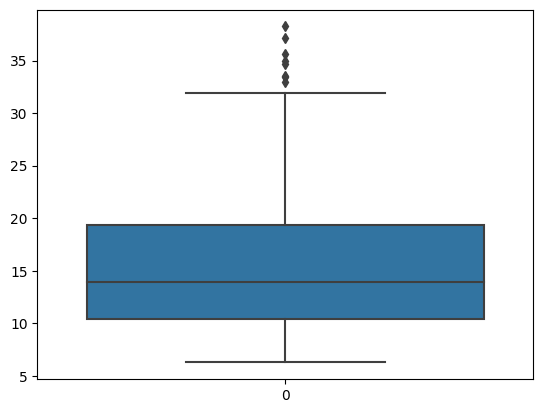

In [193]:
sns.boxplot(df.Na_to_K)

In [194]:
q1 = df.Na_to_K.quantile(.25)
q3 = df.Na_to_K.quantile(.75)

In [195]:
q1 = df.Na_to_K.quantile(.25)
q1

10.4455

In [196]:
q3 = df.Na_to_K.quantile(.75)
q3

19.38

In [197]:
IQR = q3 - q1
IQR

8.9345

In [198]:
upper_limit = q3+1.5*IQR
lower_limit = q1-1.5*IQR
upper_limit

32.78175

In [199]:
df_bp = df[df.Na_to_K<upper_limit]


<Axes: >

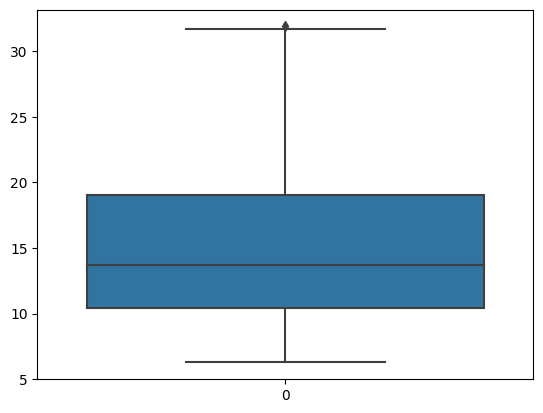

In [200]:
sns.boxplot(df_bp.Na_to_K)

In [201]:
df_bp.shape

(192, 6)

In [202]:
p99 = df.Na_to_K.quantile(0.99)
p99

35.65448999999999

In [203]:
df_p = df[df.Na_to_K<=p99]

<Axes: >

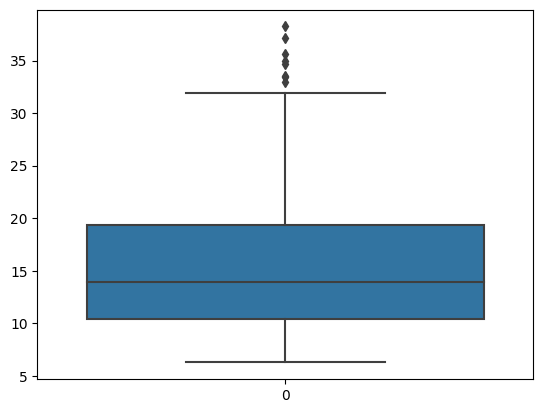

In [204]:
sns.boxplot(df.Na_to_K)

In [205]:
df_p.shape

(198, 6)

In [206]:
from scipy import stats

In [207]:
Nzscore = stats.zscore(df.Na_to_K)
Nzscore

0      1.286522
1     -0.415145
2     -0.828558
3     -1.149963
4      0.271794
         ...   
195   -0.626917
196   -0.565995
197   -0.859089
198   -0.286500
199   -0.657170
Name: Na_to_K, Length: 200, dtype: float64

In [208]:
df_z = df[np.abs(Nzscore)<=3]

<Axes: >

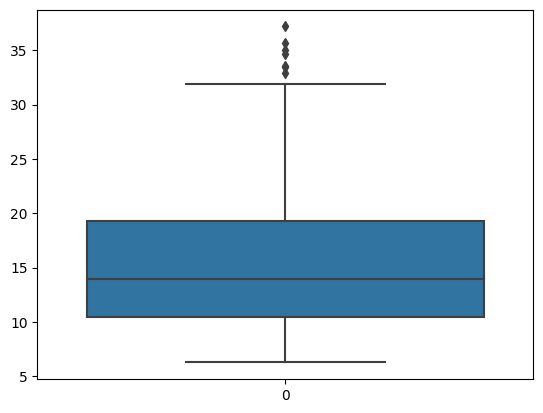

In [209]:
sns.boxplot(df_z.Na_to_K)

In [210]:
df_z.shape

(199, 6)

In [211]:
df = df_bp
df.shape

(192, 6)

In [212]:
x = df.iloc[0:,0:5]
x.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [213]:
y = df.iloc[0:,5]
y.head(5)

0    DrugY
1    drugC
2    drugC
3    drugX
4    DrugY
Name: Drug, dtype: object

In [214]:
from sklearn.model_selection import train_test_split

In [215]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=20)

In [216]:
from sklearn.preprocessing import LabelEncoder

In [217]:
le = LabelEncoder()

In [218]:
df.head(2)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC


In [219]:
xtrain['Sex']=le.fit_transform(xtrain['Sex'])

In [220]:
xtest['Sex']=le.transform(xtest['Sex'])

In [221]:
xtrain['BP']=le.fit_transform(xtrain['BP'])

In [222]:
xtest['BP']=le.transform(xtest['BP'])

In [223]:
xtrain['Cholesterol']=le.fit_transform(xtrain['Cholesterol'])

In [224]:
xtest['Cholesterol'] = le.transform(xtest['Cholesterol'])

In [227]:
xtrain['Na_to_K']=le.fit_transform(xtrain['Na_to_K'])

In [228]:
xtest['Na_to_K'] = le.transform(xtest['Na_to_K'])

In [229]:
ytrain=le.fit_transform(ytrain)

In [230]:
ytest=le.fit_transform(ytest)

In [231]:
xtrain.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K
171,45,1,1,1,31
137,35,0,0,0,75
47,68,1,1,0,38
45,66,0,2,1,9
12,43,1,1,0,99


In [232]:
ytrain

array([4, 1, 3, 4, 0, 4, 4, 4, 3, 2, 1, 2, 0, 2, 0, 0, 1, 4, 0, 0, 3, 4,
       0, 0, 0, 1, 1, 4, 4, 4, 0, 4, 0, 0, 1, 0, 4, 0, 4, 1, 4, 4, 1, 0,
       1, 4, 4, 3, 2, 0, 4, 4, 4, 0, 3, 0, 4, 4, 0, 0, 0, 4, 0, 3, 3, 2,
       4, 0, 0, 0, 0, 4, 4, 0, 4, 4, 2, 0, 0, 0, 0, 0, 4, 0, 4, 2, 0, 2,
       1, 4, 1, 1, 1, 4, 1, 0, 1, 0, 3, 0, 4, 0, 0, 1, 0, 0, 0, 4, 4, 4,
       0, 2, 0, 4, 1, 0, 0, 2, 0, 0, 4, 1, 4, 3, 3, 0, 3, 0, 4, 3, 0, 2,
       0, 4, 2, 0, 3, 0, 2, 3, 4, 4, 2, 0, 4, 4, 0, 1, 4, 2, 2, 0, 3])

In [233]:
xtest.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K
29,45,1,1,0,17
141,64,0,1,1,25
185,57,0,2,1,25
81,64,1,2,0,7
78,19,0,0,0,13


In [234]:
ytest

array([0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 3, 0, 3, 2, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 3, 3, 0])

# TASK - 2
Task 2: Build the ANN model with (input layer, min 3 hidden layers & output layer)


In [235]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [236]:
model = Sequential()
# Input layer
model.add(Dense(4,activation='relu'))
# 1st hidden layer
model.add(Dense(64,activation='relu'))
# 2nd hidden layer
model.add(Dense(32,activation='relu'))
# 3nd hidden layer
model.add(Dense(32,activation='relu'))
# Output layer
model.add(Dense(1,activation='linear'))

In [237]:
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

In [238]:
model.fit(xtrain,ytrain,batch_size=5,epochs=10,validation_data=(xtest,ytest))

Epoch 1/10
31/31 [==============================] - 1s 9ms/step - loss: 3.6985 - accuracy: 0.1438 - val_loss: 3.9232 - val_accuracy: 0.1282
Epoch 2/10
31/31 [==============================] - 0s 4ms/step - loss: 3.4247 - accuracy: 0.1111 - val_loss: 5.3007 - val_accuracy: 0.1538
Epoch 3/10
31/31 [==============================] - 0s 3ms/step - loss: 3.4035 - accuracy: 0.2222 - val_loss: 4.9224 - val_accuracy: 0.1026
Epoch 4/10
31/31 [==============================] - 0s 4ms/step - loss: 3.4888 - accuracy: 0.2026 - val_loss: 4.2665 - val_accuracy: 0.2308
Epoch 5/10
31/31 [==============================] - 0s 3ms/step - loss: 2.9820 - accuracy: 0.1438 - val_loss: 3.3577 - val_accuracy: 0.2051
Epoch 6/10
31/31 [==============================] - 0s 3ms/step - loss: 2.9825 - accuracy: 0.1307 - val_loss: 3.9629 - val_accuracy: 0.1282
Epoch 7/10
31/31 [==============================] - 0s 3ms/step - loss: 2.9416 - accuracy: 0.1373 - val_loss: 3.9092 - val_accuracy: 0.1026
Epoch 8/10
31/31 [==

In [239]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 4)                 24        
                                                                 
 dense_11 (Dense)            (None, 64)                320       
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 32)                1056      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3,513
Trainable params: 3,513
Non-trainable params: 0
_________________________________________________________________


# TASK - 3
Test the model with random data

In [240]:
model.predict([[60,0,12,1,17]])

1/1 [==============================] - 0s 141ms/step


array([[2.6812115]], dtype=float32)

In [241]:
ypred = model.predict(xtest)

2/2 [==============================] - 0s 4ms/step


In [242]:
comp = pd.DataFrame(ytest)

In [243]:
comp.columns=['Actual_values']
comp['Predicted_values'] = ypred

In [244]:
comp

,Actual_values,Predicted_values
0,0,2.031632
1,0,2.728014
2,0,2.536002
3,3,2.715473
4,1,1.206588
5,0,1.954745
6,0,1.889846
7,0,2.418819
8,0,0.553793
9,0,2.885695
